In [31]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
np.random.seed(7)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [34]:
#Méthode PPV
ppv = KNeighborsClassifier()
ppv.fit(X, Y_numerique)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(ppv.score(X, Y_numerique)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(ppv.score(X_test, Y_test_numerique)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.75


In [32]:
# load pima indians dataset
dataset = pd.read_csv("D:/Cours Dauphine/S2/AFD/projet/codeSource/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]


X, X_test, Y, Y_test = train_test_split(X, Y,test_size=0.33)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [33]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

#encoder Y_test
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y_test)
#converti le Y de chaine de caractères à numérique
Y_test_numerique = encoder.transform(Y_test)

print(Y_test_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_test_encode_binaire = np_utils.to_categorical(Y_test_numerique)#6

[0 1 1 ..., 1 0 0]
[0 0 0 ..., 0 0 1]


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy of LDA classifier on training set: 0.73
Accuracy of LDA classifier on test set: 0.73
[0 0 0 ... 0 3 0]
['A1' 'A1' 'A1' ... 'A1' 'B2' 'A1']


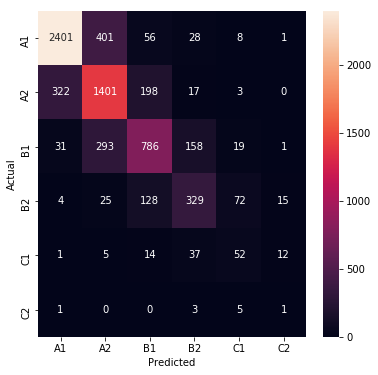

4970
Confusion Matrix:

Predicted     0     1     2    3    4   5  __all__
Actual                                            
0          2401   401    56   28    8   1     2895
1           322  1401   198   17    3   0     1941
2            31   293   786  158   19   1     1288
3             4    25   128  329   72  15      573
4             1     5    14   37   52  12      121
5             1     0     0    3    5   1       10
__all__    2760  2125  1182  572  159  30     6828


Overall Statistics:

Accuracy: 0.7278851786760399
95% CI: (0.7171598959823019, 0.7384155349336752)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.6112876385143656
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                        0         1          2  \
Population                                  6828      6828       6828   
P: Condition positive                       2895      1941       1288   
N: Condition negative                       3933      4887       5540 

In [103]:

LDA = LinearDiscriminantAnalysis()
LDA.fit(X, Y_numerique)


#print(LDA.score(X, Y_numerique))

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(LDA.score(X, Y_numerique)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(LDA.score(X_test, Y_test_numerique)))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
pred=LDA.predict(X_test)
print(pred)

classes = encoder.inverse_transform(pred)



print(classes)

conf_mat = confusion_matrix(Y_test_numerique, pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['A1','A2','B1','B2','C1','C2'], yticklabels=['A1','A2','B1','B2','C1','C2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
diagonal_sum = conf_mat.trace()
sum_of_all_elements = conf_mat.sum()
print(diagonal_sum)
erreur=1-(diagonal_sum/sum_of_all_elements)
print(erreur)
cm = ConfusionMatrix(Y_test_numerique, pred)
cm.print_stats()

In [34]:
#Méthode PPV
ppv = KNeighborsClassifier()
ppv.fit(X, Y_numerique)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(ppv.score(X, Y_numerique)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(ppv.score(X_test, Y_test_numerique)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.75


In [34]:
#Méthode PPV
ppv = KNeighborsClassifier()
ppv.fit(X, Y_numerique)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(ppv.score(X, Y_numerique)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(ppv.score(X_test, Y_test_numerique)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.75


In [34]:
#Méthode PPV
ppv = KNeighborsClassifier()
ppv.fit(X, Y_numerique)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(ppv.score(X, Y_numerique)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(ppv.score(X_test, Y_test_numerique)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.75


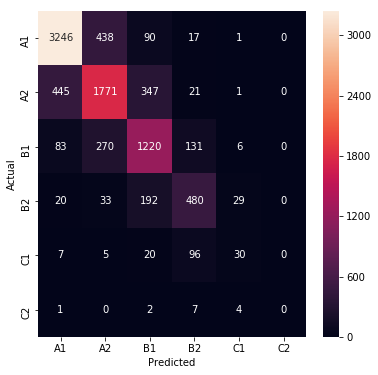

In [35]:
#Matrice de confusion pour PPV
predictions=ppv.predict(X_test)
y_pred=encoder.inverse_transform(predictions)
mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(mat, annot=True, fmt='d',
            xticklabels=['A1','A2','B1','B2','C1','C2'], yticklabels=['A1','A2','B1','B2','C1','C2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
#Erreur sur le test data calculée à partir de la matrice de confusion 
diagonal_som = mat.trace()
som_tout_elem =mat.sum()
erreur=1-(diagonal_som/som_tout_elem)
print(erreur)

0.251414623322


In [40]:
#Méthode SVM machine à vecteurs de support
svm = SVC()
svm.fit(X,Y_numerique)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X, Y_numerique)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test_numerique)))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.79


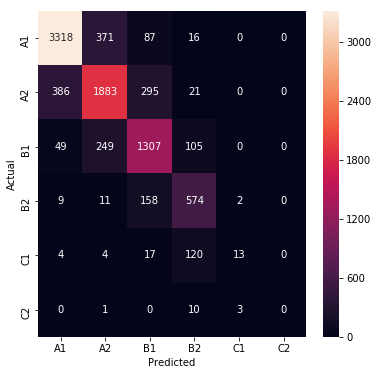

In [41]:
#Prédictions pour SVM
predictions=svm.predict(X_test)
y_pred=encoder.inverse_transform(predictions)
mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(mat, annot=True, fmt='d',
            xticklabels=['A1','A2','B1','B2','C1','C2'], yticklabels=['A1','A2','B1','B2','C1','C2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [42]:
#Erreur sur le test data calculée à partir de la matrice de confusion 
diagonal_som = mat.trace()
som_tout_elem =mat.sum()
erreur=1-(diagonal_som/som_tout_elem)
print(erreur)

0.212803727949


In [37]:
# Méthode arbre de décision
from sklearn.tree import DecisionTreeClassifier
arb = DecisionTreeClassifier().fit(X,Y_numerique)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(arb.score(X,Y_numerique)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(arb.score(X_test,Y_test_numerique)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73


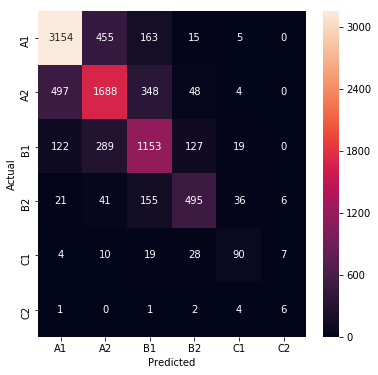

In [38]:
#Prédictions pour la méthode arbre de décision
predictions=arb.predict(X_test)
y_pred=encoder.inverse_transform(predictions)
mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(mat, annot=True, fmt='d',
            xticklabels=['A1','A2','B1','B2','C1','C2'], yticklabels=['A1','A2','B1','B2','C1','C2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
#Erreur sur le test data calculée à partir de la matrice de confusion 
diagonal_som = mat.trace()
som_tout_elem =mat.sum()
erreur=1-(diagonal_som/som_tout_elem)
print(erreur)

0.269277709974
